Distinguishability of non-orthogonal quantum states.

https://qubit.guide/4.9-distinguishing-non-orthogonal-states.html

1. Find the angle $\alpha$ between the two quantum states, $\phi_1$ and $\phi_2$.
2. $Pr_{success} = \frac{1}{2} * [1 + \sqrt{1-\cos^2(\alpha)}] $ or 
3. Find the eigen values of the delta operator $(|\phi1 \rangle \otimes \langle \phi1| + |\phi2 \rangle \otimes \langle \phi2|)$, Use the max eigen value to achieve the same result as above. 

TODO: For all test cases to pass, not the max eigenvalue but all eigenvalue absolute values must be considered. 


In [95]:
import json
import pennylane as qml
import pennylane.numpy as np

def maximal_probability(theta_1, theta_2, p_1, p_2):    
    alpha = 0.5*(1+np.sqrt(1-np.dot(phi_1, phi_2)**2))
    print ('===== ', alpha)

    phi_1 = np.array([np.cos(theta_1), np.sin(theta_1)])
    phi_2 = np.array([np.cos(theta_2), np.sin(theta_2)])
    D = p_1 * np.outer(phi_1, np.conj(phi_1)) - p_2 * np.outer(phi_2, np.conj(phi_2))
    ev, _ = np.linalg.eigh(D)
    maxp = 0.5 + 0.5*np.sum(np.abs(ev))

    return maxp

def run(test_case_input: str) -> str:
    theta1, theta2, p_1, p_2 = json.loads(test_case_input)
    prob = np.array(maximal_probability(theta1, theta2, p_1, p_2)).numpy()

    return str(prob)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)


# These are the public test cases
test_cases = [
    ('[0, 0.7853981633974483, 0.25, 0.75]', '0.8952847075210476'),
    ('[1.83259571459, 1.88495559215, 0.5, 0.5]', '0.52616798')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)
        print (output)
    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0, 0.7853981633974483, 0.25, 0.75]'...
=====  0.8535533905932737
0.8952847075210474
Correct!
Running test case 1 with input '[1.83259571459, 1.88495559215, 0.5, 0.5]'...
=====  0.5261679781215569
0.5261679781215569
Correct!


[0.92387953-0.38268343j 0.        +0.j        ]
0 0.7853981633974483 1.0


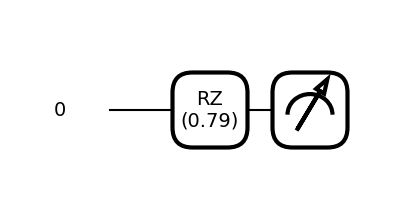

In [18]:
dev = qml.device('default.qubit', wires=1)

theta_1 = 0
theta_2 = np.pi/4

@qml.qnode(dev)
def circuit(angle):
    qml.RZ(angle, wires=0)
    return qml.expval(qml.PauliZ(0))

qml.draw_mpl(circuit, decimals=2)(theta_2)

out = circuit(theta_2)

print (dev._state)

print (theta_1, theta_2, out)
